# Systematic Training Sets for Machine Learning Potentials

This notebooks accompanies the publication located [here](https://arxiv.org/abs/2207.04009).

The DFT data used for the potential is accessible here in forms readable by [pyiron](pyiron.org) as well as [MLIP](https://gitlab.com/ashapeev/mlip-2-tutorials/-/wikis/Tutorial-2/Home).
The second part of this notebook shows how to run simulations with the potentials in [lammps](https://lammps.org/).

(be sure that you have unpacked the pyiron projects with the `Unpack.ipynb` prior to running this notebook)

## Raw Structure Files

All structures given here were calculated at a plane-wave cutoff of 550 eV and a 27x27x27 k-mesh.

Text files giving the structure, energy, forces and stresses are in the folder `structure_files`.

In [1]:
!ls structure_files/

CellMin.cfg	EverythingNoShear.cfg  IntMin.cfg   Rattle.cfg	VolMin.cfg
Everything.cfg	Hydro.cfg	       RandSPG.cfg  Shear.cfg


In [4]:
!head -n 30 structure_files/RandSPG.cfg

BEGIN_CFG
Size
   1
SuperCell
               3.024956      0.000000      0.000000
              -1.512478      2.619688      0.000000
               0.000000      0.000000      2.694816
AtomData:  id type       cartes_x      cartes_y      cartes_z           fx          fy          fz
            1    0       0.000000      0.000000      1.349225  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
Energy	     -1.156145
PlusStress:  xx          yy          zz          yz          xz          xy
               0.376685      0.376685      1.930518     -0.000000      0.000000      0.000000
Feature pyiron	16279317_0
END_CFG

BEGIN_CFG
Size
   1
SuperCell
               2.831093      0.000000      0.000000
               0.000000      2.831093      0.000000
               0.000000      0.000000      2.831093
AtomData:  id type       cartes_x      cartes_y      cartes_z           fx          fy          fz
            1    0       1.415547      1.415547      1.415547   0.00000000e+00   0.0000000

## Pyiron TrainingContainers

The same structures and data are also available as pyiron jobs, which provide additional plotting functionality and can be readily used to fit new potentials inside pyiron.

In [48]:
from pyiron import Project

In [49]:
structure_pr = Project('structures')

In [50]:
structure_pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,17302567,finished,None,Hydro,/Hydro,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 12:04:11.874011,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
1,17302568,finished,None,CellMin,/CellMin,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 12:13:00.518326,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
2,17302569,finished,None,IntMin,/IntMin,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 12:14:06.163905,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
3,17302570,finished,None,VolMin,/VolMin,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 12:15:42.795611,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
4,17302571,finished,None,Rattle,/Rattle,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 14:03:41.676545,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
5,17302572,finished,None,EverythingNoShear,/EverythingNoShear,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 17:57:26.580139,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
7,17302573,finished,None,Shear,/Shear,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-02-13 11:52:27.715162,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
6,17302576,finished,None,Everything,/Everything,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-03-29 17:28:07.344916,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None
8,17302577,finished,None,RandSPG,/RandSPG,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/structures/,2022-01-18 12:02:56.662539,None,None,zora@cmti001#1,TrainingContainer,0.4,None,None


In [51]:
j = structure_pr.load('Hydro')

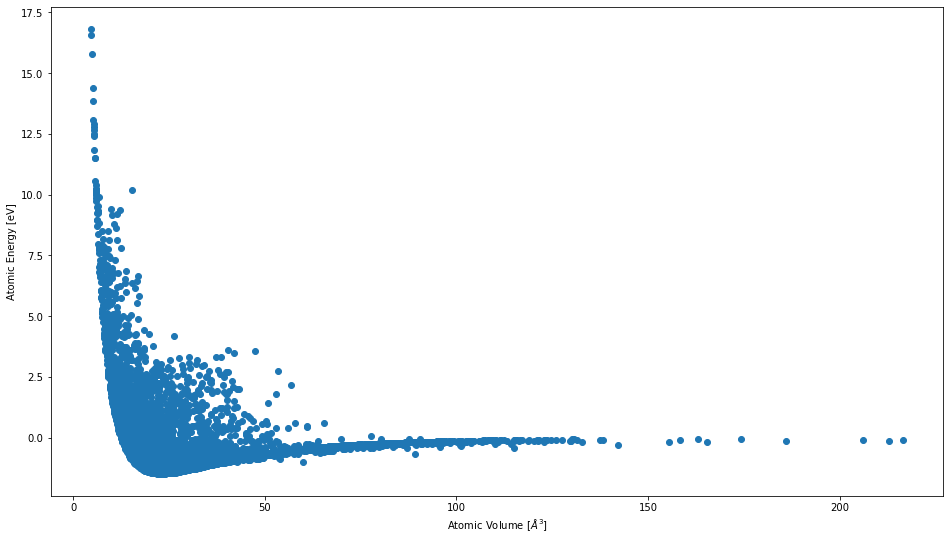

In [52]:
ev = j.plot.energy_volume()

<AxesSubplot:ylabel='Frequency'>

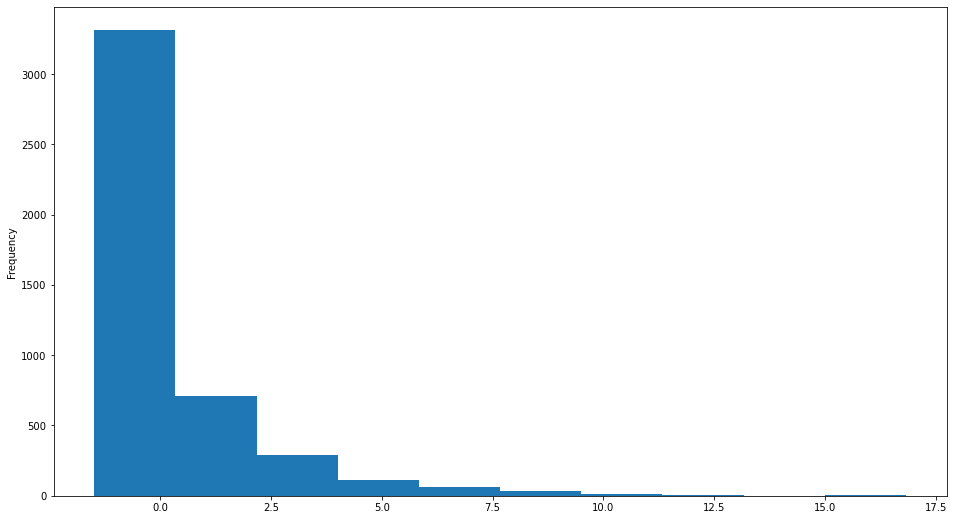

In [53]:
ev.E.plot.hist()

## Fitted Potentials

The potentential files necessary to run lammps calculations are provided in `fit_files/`.  The following lines need to be provided in your lammps script
```
pair_style mlip mlip.ini
pair_coeff * *
```

In [55]:
fit_pr = Project("fit")

In [52]:
fit_pr.job_table()

/u/zora/software/pyiron_base/pyiron_base/database/generic.py:560 sql_query: {'project': 'zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/%'}
/u/zora/software/pyiron_base/pyiron_base/database/generic.py:374 Reconnecting to DB; connection closed.


,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
1,17299655,finished,None,MTP08_1_8_5_2,/MTP08_1_8_5_2,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/Everything/,2022-02-14 17:00:28.272356,2022-02-14 17:07:20.084190,411.0,zora@cmti001#10#cm,Mlip,0.1.0,NaN,None
2,17299656,finished,None,MTP08_1_8_6_5,/MTP08_1_8_6_5,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/Everything/,2022-02-14 17:01:01.329828,2022-02-14 17:14:22.346561,801.0,zora@cmti001#10#cm,Mlip,0.1.0,NaN,None
3,17299657,finished,None,MTP08_1_8_8_2,/MTP08_1_8_8_2,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/Everything/,2022-02-14 17:01:01.139638,2022-02-14 17:20:37.324433,1176.0,zora@cmti001#10#cm,Mlip,0.1.0,NaN,None
4,17299658,finished,None,MTP10_1_8_5_2,/MTP10_1_8_5_2,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/Everything/,2022-02-14 17:01:02.554183,2022-02-14 17:13:36.720639,754.0,zora@cmti001#10#cm,Mlip,0.1.0,NaN,None
5,17299659,finished,None,MTP10_1_8_6_5,/MTP10_1_8_6_5,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/Everything/,2022-02-14 17:01:33.305928,2022-02-14 17:40:40.688334,2347.0,zora@cmti001#10#cm,Mlip,0.1.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,17299871,finished,None,MTP14_1_8_6_5_restart,/MTP14_1_8_6_5_restart,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/EverythingNoShear/,2022-05-11 17:11:54.770069,2022-05-11 18:04:57.223832,3182.0,zora@cmti001#40#cm,Mlip,0.1.0,17064443.0,None
103,17299872,finished,None,MTP14_1_8_8_2_restart,/MTP14_1_8_8_2_restart,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/EverythingNoShear/,2022-05-11 17:11:54.786860,2022-05-11 18:15:17.149168,3802.0,zora@cmti001#40#cm,Mlip,0.1.0,17064444.0,None
104,17299873,finished,None,MTP18_1_8_5_2_restart,/MTP18_1_8_5_2_restart,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/EverythingNoShear/,2022-05-11 15:54:56.289233,2022-05-11 16:29:26.525386,2070.0,zora@cmti001#80#cm,Mlip,0.1.0,17064445.0,None
105,17299874,finished,None,MTP18_1_8_6_5_restart,/MTP18_1_8_6_5_restart,/cmmc/u/,zora/pyiron/projects/2021/MgStructurePrototypes/SupplementaryNotebook/fit/EverythingNoShear/,2022-05-11 16:29:41.217868,2022-05-11 17:38:48.451907,4147.0,zora@cmti001#80#cm,Mlip,0.1.0,17064446.0,None


In [68]:
jpot = Project('fit/Everything').load('MTP24_1_8_5_2')

In [63]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,9))

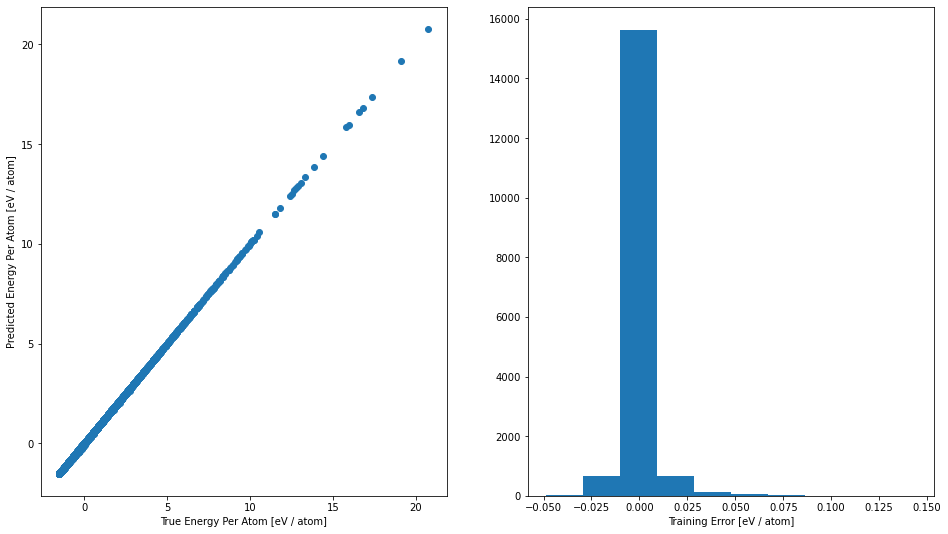

In [64]:
jpot.plot.energy_scatter_histogram()

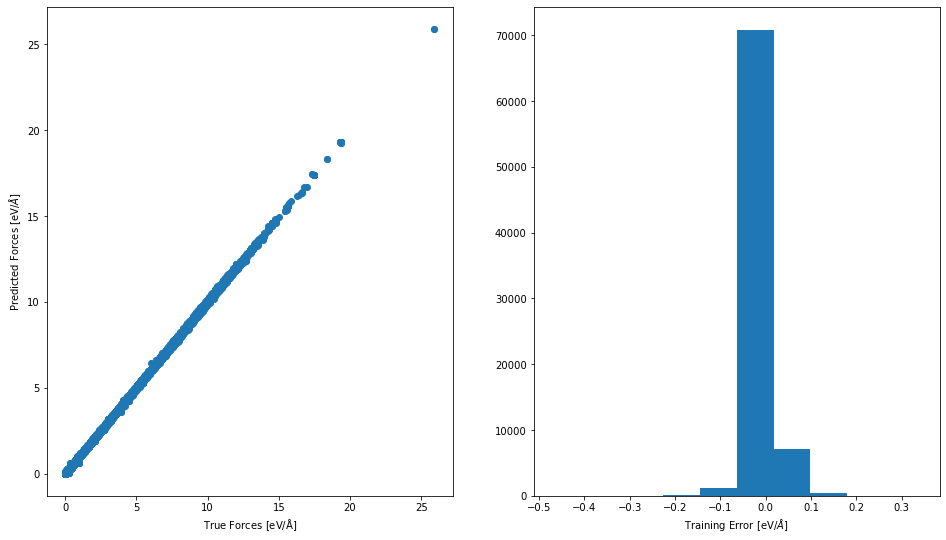

In [65]:
jpot.plot.force_scatter_histogram()

### Run a MD Simulation

In [79]:
jpot.list_files()

['testing.cfg',
 'testing_efs.cfg',
 'training_efs.cfg',
 'testing.errors',
 'training.cfg',
 'diff.cfg',
 'training_new.cfg',
 'Trained.mtp_',
 'training.log',
 'selected.cfg',
 'info.log',
 'training.errors',
 'time.out',
 'grades.cfg',
 'state.als',
 'run_queue.sh',
 'mlip.sh',
 'select.log',
 'grading.log',
 'start.mtp',
 'state.mvs',
 'error.out']

In [84]:
jpot = Project('fit/Everything').load('MTP16_1_8_8_2')

In [87]:
pr = Project('.')
jmd = pr.create.job.LammpsMlip('md')
jmd.potential = jpot.get_lammps_potential()
jmd.structure = pr.create.structure.bulk('Mg', orthorhombic=True).repeat(3)
jmd.calc_md(temperature=500, pressure=0)
jmd.run()

The job md was saved and received the ID: 17326568


In [88]:
jmd.animate_structure()

NGLWidget(max_frame=10)

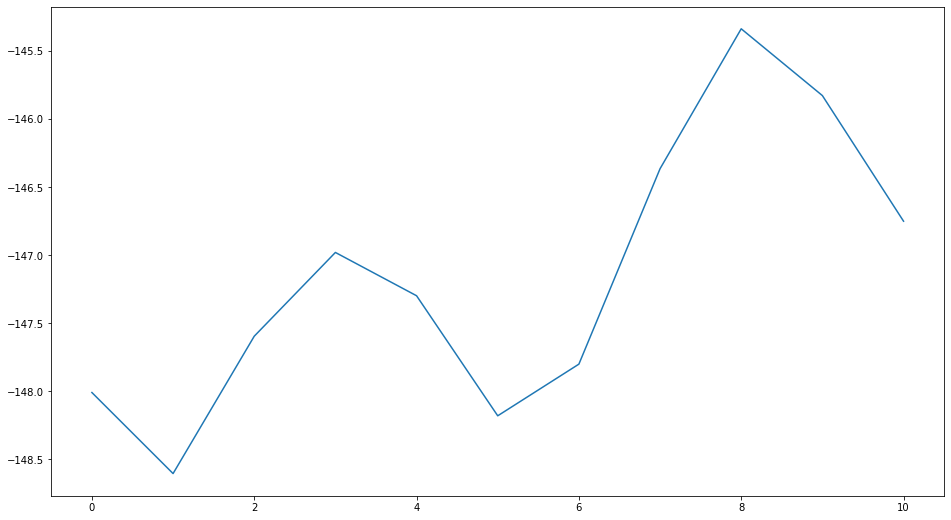

In [90]:
plt.plot(jmd.output.energy_tot)